# Ejemplo Regresión Logísitca
****
    - Basada en el ejemplo del libro: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron Released September 2019 Publisher(s): O'Reilly Media, Inc. Capítulo 4 "Logistic Regresion"

## Modulos necesarios

In [17]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

## Cargando datos

In [2]:
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [4]:
values, counts = np.unique(iris["target"], return_counts=True) 

In [5]:
print(values, counts)
print(iris["target_names"])

[0 1 2] [50 50 50]
['setosa' 'versicolor' 'virginica']


## Problema: Clasificación del dataset  "iris flowers" en las categorías:
- Clase 1: virginica
- Clase 0: Non-virginica

In [6]:
X = iris["data"][:,3] # ancho del pétalo
X = X.reshape(-1,1)
y = (iris["target"] == 2).astype(np.int32) # 1 if class iris-virginca, 0 si no (setosa y versicolor)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Logistic Regression
*****
- Documentation in scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)

In [16]:
print(y_pred)
print(y_proba[0:5,:])

[1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
[[0.04409161 0.95590839]
 [0.92922401 0.07077599]
 [0.9969939  0.0030061 ]
 [0.34198969 0.65801031]
 [0.9969939  0.0030061 ]]


## Metrics

In [18]:
fpr, tpr, ths = roc_curve(y_test,  y_pred)
auc_ = auc(fpr, tpr)
f1 = f1_score(y_test,  (y_pred>.5))
prec = precision_score(y_test,  (y_pred>.5))
rec = recall_score(y_test,  (y_pred>.5))
acc = accuracy_score(y_test,  (y_pred>.5))
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)



F1: 0.91  -- prec: 1.00  -- recall: 0.83  -- acc: 0.97


### CM of Testing set

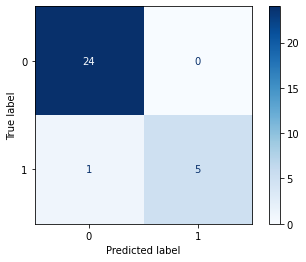

In [21]:
plot_confusion_matrix(log_reg, X_test, y_test, cmap = plt.cm.Blues)

### CM of Training se

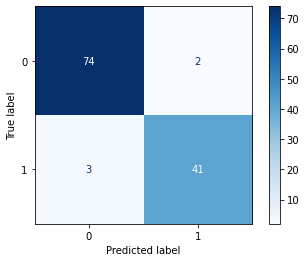

In [23]:
plot_confusion_matrix(log_reg, X_train, y_train, cmap = plt.cm.Blues)

## Plots of variable values versus probabilites

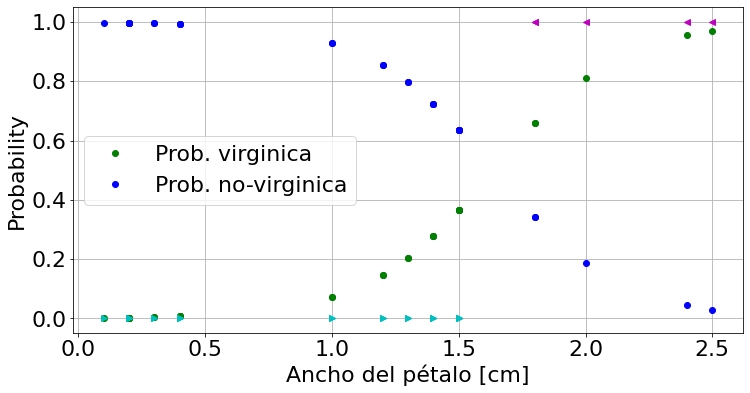

In [25]:


import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12,6))
plt.plot(X_test, y_proba[:,1], "og", label="Prob. virginica")
plt.plot(X_test, y_proba[:,0], "ob", label="Prob. no-virginica")
plt.plot(X_test[y_pred==1],np.ones((y_pred==1).sum()),"<m")
plt.plot(X_test[y_pred!=1],np.zeros((y_pred!=1).sum()),">c")

plt.xlabel("Ancho del pétalo [cm]")
plt.ylabel("Probability")
plt.legend(loc="best")
plt.grid()
plt.show()

## Probability Histogram

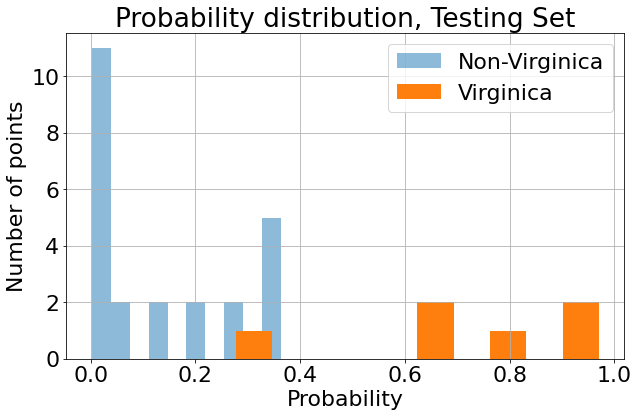

In [26]:
plt.figure(figsize=(10,6))
plt.hist(1 - y_proba[:,0][y_test == 0], label="Non-Virginica", alpha=0.5)
plt.hist(y_proba[:,1][y_test == 1], label="Virginica")
plt.legend()
plt.xlabel("Probability")
plt.ylabel("Number of points")
plt.grid()
plt.title("Probability distribution, Testing Set")
plt.show()